In [1]:
import pandas as pd

In [2]:
births = pd.read_csv("birthrate.csv")
print(births.head())
births['Day'].fillna(0, inplace=True)
births['Day'] = births['Day'].astype(int)

   Year  Month  Day Gender  Births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [3]:
births['decade'] = 10 * (births['Year'] // 10)
births.pivot_table('Births', index='decade', columns='Gender', aggfunc='sum')
print(births.head())

   Year  Month  Day Gender  Births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960


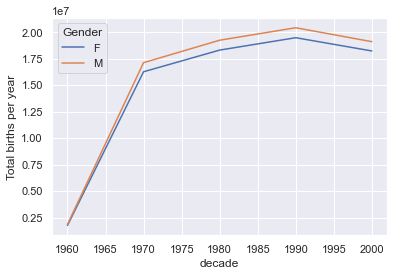

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set() 
birth_decade = births.pivot_table('Births', index='decade', columns='Gender', aggfunc='sum') 
birth_decade.plot() 
plt.ylabel("Total births per year") 
plt.show()

In [5]:
import numpy as np
quartiles = np.percentile(births['Births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [6]:
births = births.query('(Births > @mu - 5 * @sig) & (Births < @mu + 5 * @sig)')
births['Day'] = births['Day'].astype(int)
births.index = pd.to_datetime(10000 * births.Year +
                              100 * births.Month +
                              births.Day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

<ipython-input-7-7a0575569581>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


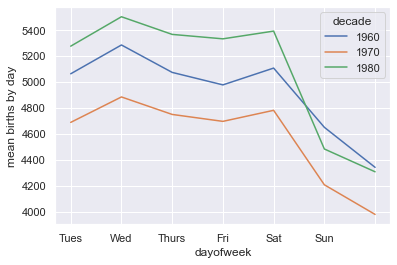

In [7]:
births.pivot_table('Births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

In [8]:
births_month = births.pivot_table('Births', [births.index.month, births.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

<ipython-input-8-0ce2a5653268>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(2012, month, day)


       Births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              Births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


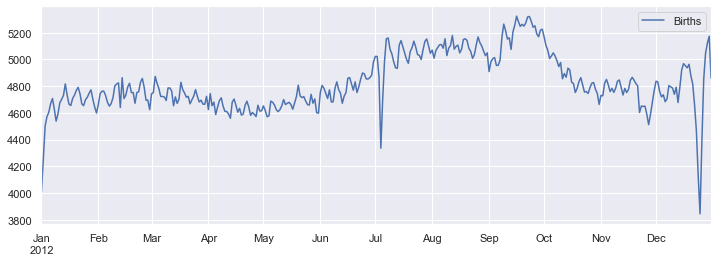

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()